Sentiment Analysis Portion for the top 50 anime reviews/ 100 reviews per anime

In [1]:
#import files
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Mounted at /content/drive


In [2]:
reviews = pd.read_csv('/content/drive/MyDrive/group project/anime_reviews.csv')
print(reviews.head(10))
print(f'Shape:{reviews.shape}')
print(reviews.info())

                title  rank  score             tags  \
0  Shingeki_no_Kyojin     1   8.54      Recommended   
1  Shingeki_no_Kyojin     1   8.54      Recommended   
2  Shingeki_no_Kyojin     1   8.54   Mixed Feelings   
3  Shingeki_no_Kyojin     1   8.54      Recommended   
4  Shingeki_no_Kyojin     1   8.54      Recommended   
5  Shingeki_no_Kyojin     1   8.54   Mixed Feelings   
6  Shingeki_no_Kyojin     1   8.54      Recommended   
7  Shingeki_no_Kyojin     1   8.54   Mixed Feelings   
8  Shingeki_no_Kyojin     1   8.54  Not Recommended   
9  Shingeki_no_Kyojin     1   8.54      Recommended   

                                              review  
0  Oh dear Shingeki no Kyojin, where do I even be...  
1  Attack on Titan Review:\n\r\nI was well aware ...  
2  Why Shingeki no Kyojin might not be the epic y...  
3  (This is my first review, so bear with me.) \n...  
4  Well, I bought into the hype. This show lives ...  
5  "Shingeki no Kyojin" or "Attack on Titan" (AOT...  
6  This i

In [3]:
x = ['title','rank','score','review','tags']
df = reviews[x]

In [4]:
df.rename(columns={"tags":"sentiment"},inplace=True)

In [5]:
def categorize_tags(tag):
    if 'Not Recommended' in tag:
        return 'Not Recommended'
    elif 'Recommended' in tag:
        return 'Recommended'
    elif 'Mixed Feelings' in tag:
        return 'Not Recommended'
    else:
        return None  # If none of the conditions are met

# Apply the categorization function to create a new column 'category'
df['category'] = df['sentiment'].apply(categorize_tags)

In [6]:
df.drop(columns={'sentiment'},inplace=True)
df.head(5)

,title,rank,score,review,category
0,Shingeki_no_Kyojin,1,8.54,"Oh dear Shingeki no Kyojin, where do I even be...",Recommended
1,Shingeki_no_Kyojin,1,8.54,Attack on Titan Review:\n\r\nI was well aware ...,Recommended
2,Shingeki_no_Kyojin,1,8.54,Why Shingeki no Kyojin might not be the epic y...,Not Recommended
3,Shingeki_no_Kyojin,1,8.54,"(This is my first review, so bear with me.) \n...",Recommended
4,Shingeki_no_Kyojin,1,8.54,"Well, I bought into the hype. This show lives ...",Recommended


In [41]:
x = ['title','rank','score']
showRatings = df[x]

<ipython-input-46-e831a1152ccc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  showRatings.sort_values('score',ascending=False,inplace=True)


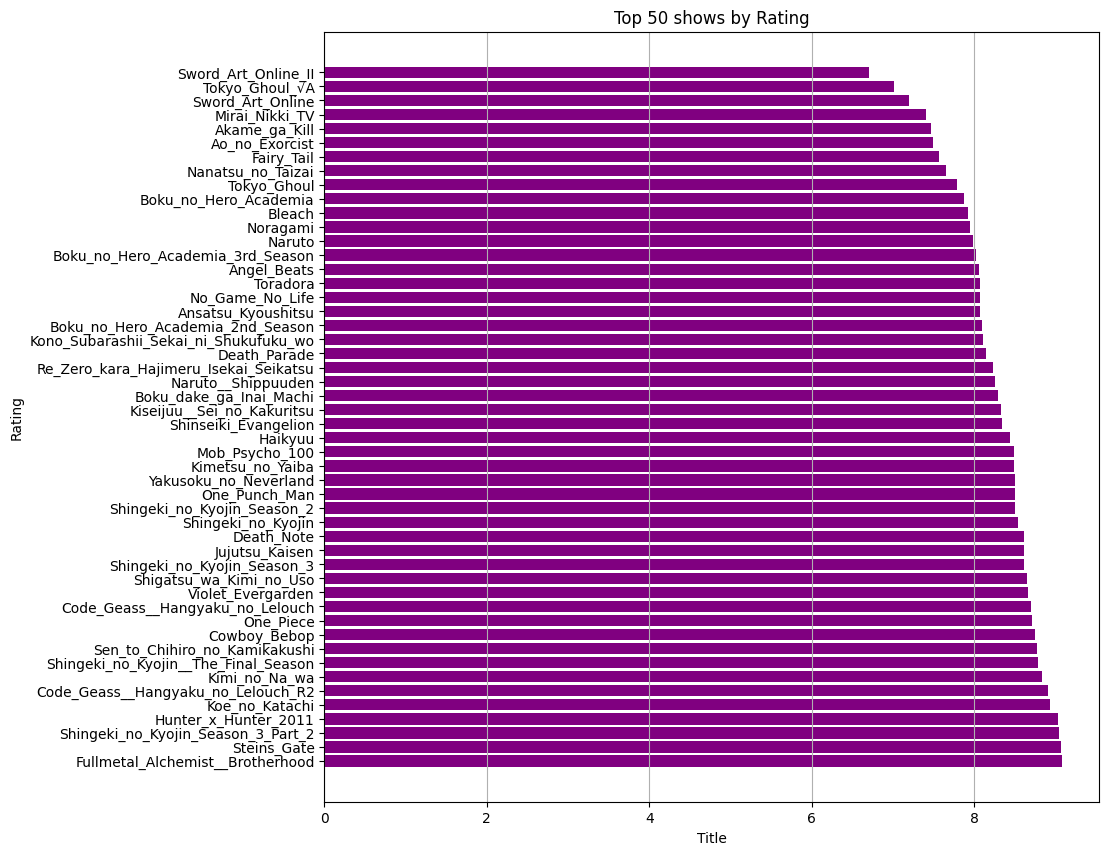

In [46]:
showRatings.sort_values('score',ascending=False,inplace=True)
plt.figure(figsize=(10, 10))
plt.barh(showRatings['title'], showRatings['score'], color='purple')
plt.xlabel('Title')
plt.ylabel('Rating')
plt.title('Top 50 shows by Rating')
plt.grid(axis='x')

plt.show()

Data Preprocessing

In [7]:
import nltk
nltk.download('punkt')
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from urllib.request import urlretrieve
import zipfile
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
stop_words = set(stopwords.words('english'))

# Tokenization function using NLTK word_tokenize
def tokenization(sentence):
    return word_tokenize(sentence)

# Preprocess and tokenize the reviews
df['tokenized_review'] = df['review'].apply(lambda x: tokenization(re.sub(r'[^a-zA-z\s]', '', x).lower()))


# Display the updated DataFrame
print(df.head())


                title  rank  score  \
0  Shingeki_no_Kyojin     1   8.54   
1  Shingeki_no_Kyojin     1   8.54   
2  Shingeki_no_Kyojin     1   8.54   
3  Shingeki_no_Kyojin     1   8.54   
4  Shingeki_no_Kyojin     1   8.54   

                                              review         category  \
0  Oh dear Shingeki no Kyojin, where do I even be...      Recommended   
1  Attack on Titan Review:\n\r\nI was well aware ...      Recommended   
2  Why Shingeki no Kyojin might not be the epic y...  Not Recommended   
3  (This is my first review, so bear with me.) \n...      Recommended   
4  Well, I bought into the hype. This show lives ...      Recommended   

                                    tokenized_review  \
0  [oh, dear, shingeki, no, kyojin, where, do, i,...   
1  [attack, on, titan, review, i, was, well, awar...   
2  [why, shingeki, no, kyojin, might, not, be, th...   
3  [this, is, my, first, review, so, bear, with, ...   
4  [well, i, bought, into, the, hype, this, show,...

In [14]:
df['cleanedReviewString'] = df['tokenized_review'].apply(lambda x: (' '.join(x)))

In [15]:
df.head(10)

,title,rank,score,review,category,tokenized_review,cleanedReviewString
0,Shingeki_no_Kyojin,1,8.54,"Oh dear Shingeki no Kyojin, where do I even be...",Recommended,"[oh, dear, shingeki, no, kyojin, where, do, i,...",oh dear shingeki no kyojin where do i even beg...
1,Shingeki_no_Kyojin,1,8.54,Attack on Titan Review:\n\r\nI was well aware ...,Recommended,"[attack, on, titan, review, i, was, well, awar...",attack on titan review i was well aware of the...
2,Shingeki_no_Kyojin,1,8.54,Why Shingeki no Kyojin might not be the epic y...,Not Recommended,"[why, shingeki, no, kyojin, might, not, be, th...",why shingeki no kyojin might not be the epic y...
3,Shingeki_no_Kyojin,1,8.54,"(This is my first review, so bear with me.) \n...",Recommended,"[this, is, my, first, review, so, bear, with, ...",this is my first review so bear with me spoile...
4,Shingeki_no_Kyojin,1,8.54,"Well, I bought into the hype. This show lives ...",Recommended,"[well, i, bought, into, the, hype, this, show,...",well i bought into the hype this show lives up...
5,Shingeki_no_Kyojin,1,8.54,"""Shingeki no Kyojin"" or ""Attack on Titan"" (AOT...",Not Recommended,"[shingeki, no, kyojin, or, attack, on, titan, ...",shingeki no kyojin or attack on titan aot has ...
6,Shingeki_no_Kyojin,1,8.54,This is by far the most overhyped anime I have...,Recommended,"[this, is, by, far, the, most, overhyped, anim...",this is by far the most overhyped anime i have...
7,Shingeki_no_Kyojin,1,8.54,Shingeki no Kyojin or as it is more commonly k...,Not Recommended,"[shingeki, no, kyojin, or, as, it, is, more, c...",shingeki no kyojin or as it is more commonly k...
8,Shingeki_no_Kyojin,1,8.54,"[REUPLOAD]\n\r\n""I'm going to kill all the Tit...",Not Recommended,"[[, reupload, ], im, going, to, kill, all, the...",[ reupload ] im going to kill all the titans w...
9,Shingeki_no_Kyojin,1,8.54,First impression must be good. They always see...,Recommended,"[first, impression, must, be, good, they, alwa...",first impression must be good they always seem...


In [16]:
categories = df['category']
labels = set(categories)
print('Sentiment Categories', labels)
count = df['category'].value_counts()
print(count)

Sentiment Categories {'Recommended', 'Not Recommended'}
Recommended        3425
Not Recommended    1575
Name: category, dtype: int64


In [10]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.5 MB/s eta 0:00:00


In [18]:
def vader_score(text):
  return analyzer.polarity_scores(text)

In [19]:
df['vader_score'] = df['cleanedReviewString'].apply(vader_score)
df.head(10)

,title,rank,score,review,category,tokenized_review,cleanedReviewString,vader_score
0,Shingeki_no_Kyojin,1,8.54,"Oh dear Shingeki no Kyojin, where do I even be...",Recommended,"[oh, dear, shingeki, no, kyojin, where, do, i,...",oh dear shingeki no kyojin where do i even beg...,"{'neg': 0.082, 'neu': 0.736, 'pos': 0.182, 'co..."
1,Shingeki_no_Kyojin,1,8.54,Attack on Titan Review:\n\r\nI was well aware ...,Recommended,"[attack, on, titan, review, i, was, well, awar...",attack on titan review i was well aware of the...,"{'neg': 0.121, 'neu': 0.721, 'pos': 0.157, 'co..."
2,Shingeki_no_Kyojin,1,8.54,Why Shingeki no Kyojin might not be the epic y...,Not Recommended,"[why, shingeki, no, kyojin, might, not, be, th...",why shingeki no kyojin might not be the epic y...,"{'neg': 0.1, 'neu': 0.757, 'pos': 0.143, 'comp..."
3,Shingeki_no_Kyojin,1,8.54,"(This is my first review, so bear with me.) \n...",Recommended,"[this, is, my, first, review, so, bear, with, ...",this is my first review so bear with me spoile...,"{'neg': 0.095, 'neu': 0.736, 'pos': 0.169, 'co..."
4,Shingeki_no_Kyojin,1,8.54,"Well, I bought into the hype. This show lives ...",Recommended,"[well, i, bought, into, the, hype, this, show,...",well i bought into the hype this show lives up...,"{'neg': 0.059, 'neu': 0.816, 'pos': 0.125, 'co..."
5,Shingeki_no_Kyojin,1,8.54,"""Shingeki no Kyojin"" or ""Attack on Titan"" (AOT...",Not Recommended,"[shingeki, no, kyojin, or, attack, on, titan, ...",shingeki no kyojin or attack on titan aot has ...,"{'neg': 0.055, 'neu': 0.789, 'pos': 0.156, 'co..."
6,Shingeki_no_Kyojin,1,8.54,This is by far the most overhyped anime I have...,Recommended,"[this, is, by, far, the, most, overhyped, anim...",this is by far the most overhyped anime i have...,"{'neg': 0.111, 'neu': 0.729, 'pos': 0.16, 'com..."
7,Shingeki_no_Kyojin,1,8.54,Shingeki no Kyojin or as it is more commonly k...,Not Recommended,"[shingeki, no, kyojin, or, as, it, is, more, c...",shingeki no kyojin or as it is more commonly k...,"{'neg': 0.071, 'neu': 0.775, 'pos': 0.155, 'co..."
8,Shingeki_no_Kyojin,1,8.54,"[REUPLOAD]\n\r\n""I'm going to kill all the Tit...",Not Recommended,"[[, reupload, ], im, going, to, kill, all, the...",[ reupload ] im going to kill all the titans w...,"{'neg': 0.164, 'neu': 0.711, 'pos': 0.125, 'co..."
9,Shingeki_no_Kyojin,1,8.54,First impression must be good. They always see...,Recommended,"[first, impression, must, be, good, they, alwa...",first impression must be good they always seem...,"{'neg': 0.095, 'neu': 0.736, 'pos': 0.169, 'co..."


In [21]:
df['vader_compound']=df['vader_score'].apply(lambda score_dict: score_dict['compound'])
df['vader_negative']=df['vader_score'].apply(lambda score_dict: score_dict['neg'])
df['vader_neutral']=df['vader_score'].apply(lambda score_dict: score_dict['neu'])
df['vader_positive']=df['vader_score'].apply(lambda score_dict: score_dict['pos'])

In [22]:
df.head(-10)

,title,rank,score,review,category,tokenized_review,cleanedReviewString,vader_score,vader_compound,vader_negative,vader_neutral,vader_positive
0,Shingeki_no_Kyojin,1,8.54,"Oh dear Shingeki no Kyojin, where do I even be...",Recommended,"[oh, dear, shingeki, no, kyojin, where, do, i,...",oh dear shingeki no kyojin where do i even beg...,"{'neg': 0.082, 'neu': 0.736, 'pos': 0.182, 'co...",0.9992,0.082,0.736,0.182
1,Shingeki_no_Kyojin,1,8.54,Attack on Titan Review:\n\r\nI was well aware ...,Recommended,"[attack, on, titan, review, i, was, well, awar...",attack on titan review i was well aware of the...,"{'neg': 0.121, 'neu': 0.721, 'pos': 0.157, 'co...",0.9979,0.121,0.721,0.157
2,Shingeki_no_Kyojin,1,8.54,Why Shingeki no Kyojin might not be the epic y...,Not Recommended,"[why, shingeki, no, kyojin, might, not, be, th...",why shingeki no kyojin might not be the epic y...,"{'neg': 0.1, 'neu': 0.757, 'pos': 0.143, 'comp...",0.9923,0.100,0.757,0.143
3,Shingeki_no_Kyojin,1,8.54,"(This is my first review, so bear with me.) \n...",Recommended,"[this, is, my, first, review, so, bear, with, ...",this is my first review so bear with me spoile...,"{'neg': 0.095, 'neu': 0.736, 'pos': 0.169, 'co...",0.9949,0.095,0.736,0.169
4,Shingeki_no_Kyojin,1,8.54,"Well, I bought into the hype. This show lives ...",Recommended,"[well, i, bought, into, the, hype, this, show,...",well i bought into the hype this show lives up...,"{'neg': 0.059, 'neu': 0.816, 'pos': 0.125, 'co...",0.9777,0.059,0.816,0.125
...,...,...,...,...,...,...,...,...,...,...,...,...
4985,Fairy_Tail,50,7.57,So fairy tail's anime has come to a sudden end...,Recommended,"[so, fairy, tails, anime, has, come, to, a, su...",so fairy tails anime has come to a sudden end ...,"{'neg': 0.091, 'neu': 0.729, 'pos': 0.18, 'com...",0.9934,0.091,0.729,0.180
4986,Fairy_Tail,50,7.57,"The story is ok, the characters are fun, and t...",Not Recommended,"[the, story, is, ok, the, characters, are, fun...",the story is ok the characters are fun and the...,"{'neg': 0.065, 'neu': 0.749, 'pos': 0.185, 'co...",0.8991,0.065,0.749,0.185
4987,Fairy_Tail,50,7.57,"To begin with, I don't usually watch action-pa...",Recommended,"[to, begin, with, i, dont, usually, watch, act...",to begin with i dont usually watch actionpacke...,"{'neg': 0.075, 'neu': 0.702, 'pos': 0.224, 'co...",0.9977,0.075,0.702,0.224
4988,Fairy_Tail,50,7.57,Fairy Tail is one of those animes that start o...,Recommended,"[fairy, tail, is, one, of, those, animes, that...",fairy tail is one of those animes that start o...,"{'neg': 0.147, 'neu': 0.648, 'pos': 0.205, 'co...",0.9097,0.147,0.648,0.205


In [24]:
x = ['title','rank','score']
titles = df[x]
titles['title'].unique()

array(['Shingeki_no_Kyojin', 'Death_Note',
       'Fullmetal_Alchemist__Brotherhood', 'One_Punch_Man',
       'Sword_Art_Online', 'Boku_no_Hero_Academia', 'Kimetsu_no_Yaiba',
       'Naruto', 'Tokyo_Ghoul', 'Hunter_x_Hunter_2011', 'Kimi_no_Na_wa',
       'Shingeki_no_Kyojin_Season_2', 'Steins_Gate',
       'Boku_no_Hero_Academia_2nd_Season', 'Naruto__Shippuuden',
       'Jujutsu_Kaisen', 'No_Game_No_Life', 'Shingeki_no_Kyojin_Season_3',
       'One_Piece', 'Koe_no_Katachi', 'Code_Geass__Hangyaku_no_Lelouch',
       'Shingeki_no_Kyojin_Season_3_Part_2', 'Toradora',
       'Shigatsu_wa_Kimi_no_Uso', 'Re_Zero_kara_Hajimeru_Isekai_Seikatsu',
       'Boku_no_Hero_Academia_3rd_Season', 'Noragami',
       'Boku_dake_ga_Inai_Machi', 'Akame_ga_Kill', 'Angel_Beats',
       'Nanatsu_no_Taizai', 'Mob_Psycho_100', 'Mirai_Nikki_TV',
       'Ansatsu_Kyoushitsu', 'Sword_Art_Online_II',
       'Shingeki_no_Kyojin__The_Final_Season', 'Haikyuu',
       'Yakusoku_no_Neverland', 'Bleach',
       'Kono_Suba

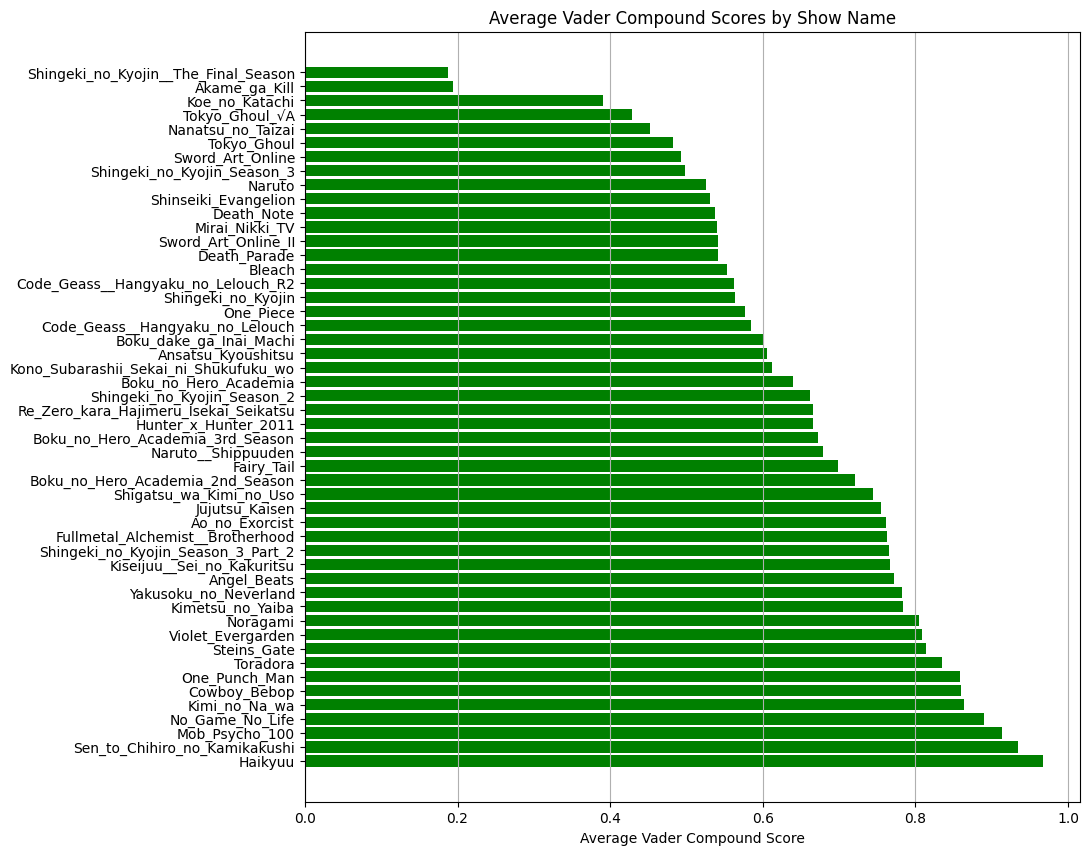

In [40]:
average_compound = df.groupby('title')['vader_compound'].mean().reset_index()
average_compound.sort_values('vader_compound', ascending=False, inplace=True)

# Plotting
plt.figure(figsize=(10, 10))
plt.barh(average_compound['title'], average_compound['vader_compound'], color='green')
plt.xlabel('Average Vader Compound Score')
plt.title('Average Vader Compound Scores by Show Name')
plt.grid(axis='x')

plt.show()

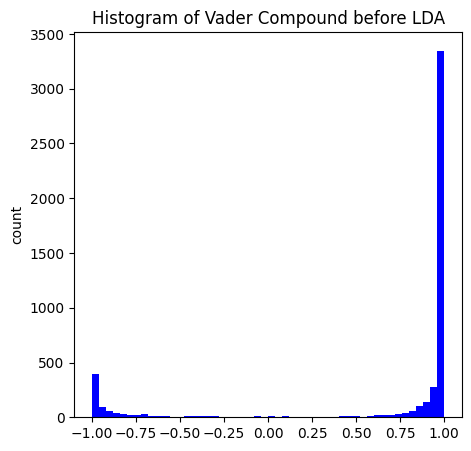

In [47]:
import matplotlib.pyplot as plt
num_bins= 50
plt.figure(figsize=(5,5))
n, bins, patches = plt.hist(df.vader_compound, num_bins, facecolor='blue')

plt.ylabel('count')
plt.title('Histogram of Vader Compound before LDA')
plt.show()


As we can see, there is an overwhelming number of positive reviews compared to negative, given I did scrape the top 100 reviews per show, therefore it is inenvitable that I will encounter more postiive reviews than negative

One idea I had was to see if the Vader Compound scores match the cateogry of sentiment that the reviewer provided in the review

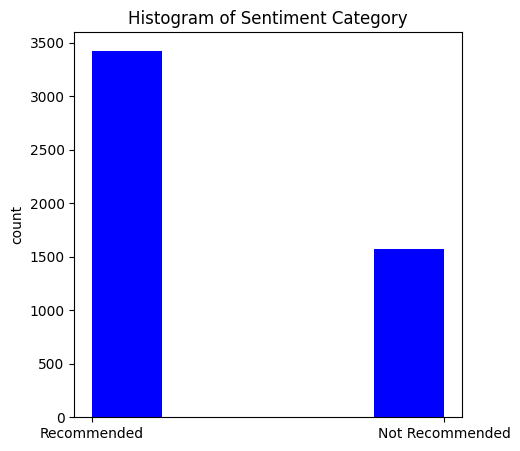

In [48]:
num_bins= 5
plt.figure(figsize=(5,5))
n, bins, patches = plt.hist(df.category, num_bins, facecolor='blue')

plt.ylabel('count')
plt.title('Histogram of Sentiment Category')
plt.show()

Topic Modeling with LDA Preprocessing

- I want to see if i can derive sentiment off the topics of the review
- i must clean the reviews again to remove

In [49]:
x = ['title','rank','score','tokenized_review']
reviews = df[x]

In [50]:
reviews['tokenized_titles'] = reviews['title'].apply(lambda s: [word for word in s.split('_') if word.lower() not in set(stopwords.words('english'))])

<ipython-input-50-c9deeab83993>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['tokenized_titles'] = reviews['title'].apply(lambda s: [word for word in s.split('_') if word.lower() not in set(stopwords.words('english'))])


In [51]:
reviews['tokenized_review'] = reviews['tokenized_review'].apply(lambda x: [word for word in x if word.lower() not in set(stopwords.words('english'))])

<ipython-input-51-cd1bcbf52996>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['tokenized_review'] = reviews['tokenized_review'].apply(lambda x: [word for word in x if word.lower() not in set(stopwords.words('english'))])


In [52]:
reviews['tokenized_review'] = reviews['tokenized_review'].apply(lambda x: [word for word in x if len(word) >= 4])

<ipython-input-52-9df691a9fffd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['tokenized_review'] = reviews['tokenized_review'].apply(lambda x: [word for word in x if len(word) >= 4])


In [53]:
!pip install langid
import langid

# Function to remove non-English words
def remove_non_english_words(review_tokens):
    return [word for word in review_tokens if langid.classify(word)[0] == 'en']

# Applying the function to the DataFrame using apply
reviews['tokenized_review'] = reviews['tokenized_review'].apply(remove_non_english_words)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 27.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941172 sha256=79cbc59e83b23870c56f63381cb40043200821d4591adb6ed0d0d7eca57408a2
  Stored in directory: /root/.cache/pip/wheels/23/c8/c6/eed80894918490a175677414d40bd7c851413bbe03d4856c3c
Successfully built langid


<ipython-input-53-4e20576783a8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['tokenized_review'] = reviews['tokenized_review'].apply(remove_non_english_words)


In [54]:
reviews['tokenized_titles'] = reviews['tokenized_titles'].apply(lambda tokens: [token.lower() for token in tokens])

<ipython-input-54-2483d23b0c38>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['tokenized_titles'] = reviews['tokenized_titles'].apply(lambda tokens: [token.lower() for token in tokens])


In [55]:
#reordering
x = ['tokenized_titles','rank','score','tokenized_review']
reviews= reviews[x]

In [56]:
def remove_words_in_titles(review_tokens, title_tokens):
    return [word.lower() for word in review_tokens if word.lower() not in title_tokens]

In [57]:
reviews['tokenized_review'] = reviews.apply(lambda row: remove_words_in_titles(row['tokenized_review'], row['tokenized_titles']), axis=1)

In [58]:
import re
from gensim import corpora

In [59]:
dictionary = corpora.Dictionary(reviews['tokenized_review'].tolist())
corpus = [dictionary.doc2bow(doc) for doc in reviews['tokenized_review'].tolist()]
print(corpus[0])

[(0, 2), (1, 1), (2, 3), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 25), (15, 1), (16, 4), (17, 1), (18, 3), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 1), (25, 1), (26, 2), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 2), (34, 2), (35, 1), (36, 1), (37, 2), (38, 1), (39, 1), (40, 1), (41, 6), (42, 1), (43, 1), (44, 3), (45, 12), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 2), (53, 1), (54, 1), (55, 2), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 2), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 2), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 5), (81, 1), (82, 1), (83, 1), (84, 4), (85, 1), (86, 4), (87, 1), (88, 2), (89, 1), (90, 1), (91, 1), (92, 2), (93, 2), (94, 1), (95, 1), (96, 2), (97, 1), (98, 1), (99, 2), (100, 3), (101, 2), (102, 1), (103, 1), (104, 1), (105, 1), (106, 1), (107, 2), (108, 1), (109, 1), (110, 2

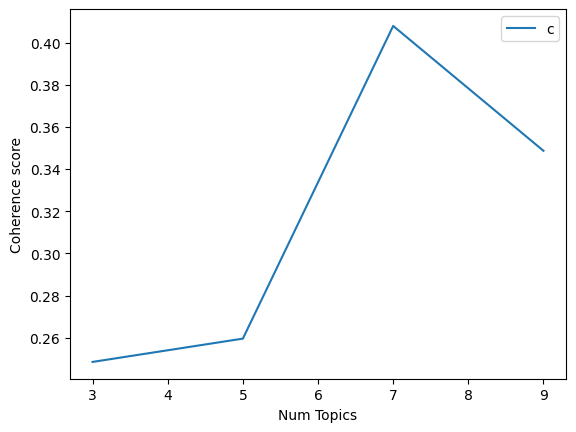

In [62]:
import gensim
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

def calculate_coherence_values(dictionary, corpus, texts, limit, start=3, step=2):
    '''
    Compute c_v coherence for various number of topics to find the OPTIMAL NUMBER OF TOPICS.

    Parameters:
              dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              limit : Max num of topics
              start: starting number of topics
              step=n : increase the number by n
    '''

    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

tokenized_review = df['tokenized_review'].tolist()

# Can take a while to see the outputs.
model_list, coherence_values = calculate_coherence_values(dictionary=dictionary, corpus=corpus, texts=tokenized_review, start=3, limit=11, step=2)

# Show graph
limit = 11
start = 3
step = 2
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


In [63]:
NUM_TOPICS = 9
NUM_WORDS = 10
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=20)
topics = ldamodel.print_topics(num_words=NUM_WORDS) #you can increase the number of keywords.
for topic in topics:
    print(topic)

(0, '0.017*"show" + 0.015*"like" + 0.012*"character" + 0.012*"characters" + 0.010*"even" + 0.008*"good" + 0.007*"dont" + 0.006*"much" + 0.006*"shounen" + 0.006*"doesnt"')
(1, '0.020*"titan" + 0.013*"love" + 0.011*"eren" + 0.011*"titans" + 0.009*"people" + 0.008*"demon" + 0.008*"human" + 0.006*"world" + 0.006*"humans" + 0.005*"demons"')
(2, '0.005*"whit" + 0.001*"diferent" + 0.001*"preety" + 0.001*"completelly" + 0.001*"killfun" + 0.001*"pedro" + 0.001*"sountrack" + 0.001*"spended" + 0.001*"souncomfortable" + 0.001*"centipedewhich"')
(3, '0.026*"travel" + 0.011*"scientist" + 0.009*"mayuri" + 0.006*"rintarou" + 0.006*"machine" + 0.006*"makise" + 0.006*"daru" + 0.004*"text" + 0.004*"kyouma" + 0.003*"para"')
(4, '0.016*"show" + 0.012*"series" + 0.011*"characters" + 0.007*"character" + 0.006*"story" + 0.006*"also" + 0.005*"world" + 0.005*"well" + 0.004*"many" + 0.004*"human"')
(5, '0.011*"movie" + 0.009*"like" + 0.008*"time" + 0.007*"even" + 0.007*"away" + 0.006*"story" + 0.006*"character" 

In [64]:
topics = []
for idx, topic in ldamodel.print_topics(-1, num_words=NUM_WORDS):
    #print out topic numbers and keywords.
#    print('Topic: {} Word: {}'.format(idx, topic))

    #print out keywords only (without probability)
    key_words_only = " ".join(re.findall("[a-zA-Z]+", topic))
    topics.append({'Topic': idx, 'Keywords': key_words_only})
    print ('Topic:',idx,key_words_only)

Topic: 0 show like character characters even good dont much shounen doesnt
Topic: 1 titan love eren titans people demon human world humans demons
Topic: 2 whit diferent preety completelly killfun pedro sountrack spended souncomfortable centipedewhich
Topic: 3 travel scientist mayuri rintarou machine makise daru text kyouma para
Topic: 4 show series characters character story also world well many human
Topic: 5 movie like time even away story character world would film
Topic: 6 light aqua notebook shinigami yagami lights pirate ryuk pirates misa
Topic: 7 vampires vampire forwards urahara cheaper shippudean overthrown yamane dramaromance repetetive
Topic: 8 anime characters story like really show character good well first


In [65]:
topicsDf = pd.DataFrame(topics)

In [66]:
#Find the dominant topic in each document
list_in_list=[]

#for the first 5 documents.
doc_topics = ldamodel.get_document_topics(corpus[:-100])
print('document topics: ', doc_topics)

for each_doc in doc_topics:

    #get the assigned topics and list them in terms of their highest to lowest probability.
    top_topic=sorted(each_doc, key=lambda x: x[1], reverse=True)[0]

    #If you want to see the 2nd dominant topic:
    #top_topic_2=sorted(each_doc, key=lambda x: x[1], reverse=True)[1]

    print ("highest",top_topic)

    #select topic number & its probability.
    top_topic_num=top_topic[0]
    top_topic_prob=top_topic[1]

    #make a dataframe and fill out within each column.
    list=[top_topic_num,top_topic_prob]
    list_in_list.extend([list])
    #print (list_in_list)
#create pandas dataframe with column names.
df2 = pd.DataFrame(list_in_list, columns = ['Dominant Topic', 'Probability'])
pd.set_option("display.max_rows", None, "display.max_columns", None)
print (df2)

Streaming output truncated to the last 5000 lines.
highest (8, 0.6414892)
highest (8, 0.6059176)
highest (0, 0.36166376)
highest (5, 0.33471102)
highest (8, 0.9592392)
highest (4, 0.9957623)
highest (8, 0.5124656)
highest (4, 0.7586589)
highest (4, 0.492271)
highest (8, 0.6954769)
highest (8, 0.8952369)
highest (8, 0.9567603)
highest (8, 0.6465502)
highest (4, 0.49469188)
highest (8, 0.50723183)
highest (8, 0.6625022)
highest (8, 0.61452127)
highest (8, 0.9353996)
highest (8, 0.62174076)
highest (8, 0.7365518)
highest (5, 0.48122296)
highest (4, 0.56122917)
highest (4, 0.49717304)
highest (4, 0.61264)
highest (8, 0.64644086)
highest (4, 0.36394548)
highest (8, 0.8375)
highest (8, 0.6231799)
highest (5, 0.56994116)
highest (8, 0.9846598)
highest (8, 0.47728342)
highest (8, 0.9759678)
highest (4, 0.4739079)
highest (4, 0.57605195)
highest (4, 0.7255958)
highest (8, 0.983211)
highest (8, 0.88100636)
highest (8, 0.8401072)
highest (8, 0.49175733)
highest (8, 0.39583537)
highest (8, 0.98183

In [67]:
topicsDf

,Topic,Keywords
0,0,show like character characters even good dont ...
1,1,titan love eren titans people demon human worl...
2,2,whit diferent preety completelly killfun pedro...
3,3,travel scientist mayuri rintarou machine makis...
4,4,show series characters character story also wo...
5,5,movie like time even away story character worl...
6,6,light aqua notebook shinigami yagami lights pi...
7,7,vampires vampire forwards urahara cheaper ship...
8,8,anime characters story like really show charac...


In [68]:
topicsDf['vader_score'] = topicsDf['Keywords'].apply(vader_score)
topicsDf['vader_compound']=topicsDf['vader_score'].apply(lambda score_dict: score_dict['compound'])
topicsDf['vader_negative']=topicsDf['vader_score'].apply(lambda score_dict: score_dict['neg'])
topicsDf['vader_neutral']=topicsDf['vader_score'].apply(lambda score_dict: score_dict['neu'])
topicsDf['vader_positive']=topicsDf['vader_score'].apply(lambda score_dict: score_dict['pos'])
topicsDf.head(10)

,Topic,Keywords,vader_score,vader_compound,vader_negative,vader_neutral,vader_positive
0,0,show like character characters even good dont ...,"{'neg': 0.0, 'neu': 0.597, 'pos': 0.403, 'comp...",0.6597,0.0,0.597,0.403
1,1,titan love eren titans people demon human worl...,"{'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'comp...",0.6369,0.0,0.682,0.318
2,2,whit diferent preety completelly killfun pedro...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,1.000,0.000
3,3,travel scientist mayuri rintarou machine makis...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,1.000,0.000
4,4,show series characters character story also wo...,"{'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'comp...",0.2732,0.0,0.811,0.189
5,5,movie like time even away story character worl...,"{'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'comp...",0.3612,0.0,0.783,0.217
6,6,light aqua notebook shinigami yagami lights pi...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,1.000,0.000
7,7,vampires vampire forwards urahara cheaper ship...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,1.000,0.000
8,8,anime characters story like really show charac...,"{'neg': 0.0, 'neu': 0.474, 'pos': 0.526, 'comp...",0.7759,0.0,0.474,0.526


In [78]:
df2.head()

,Dominant Topic,Probability
0,8,0.489873
1,8,0.550407
2,8,0.580739
3,4,0.476968
4,8,0.701961


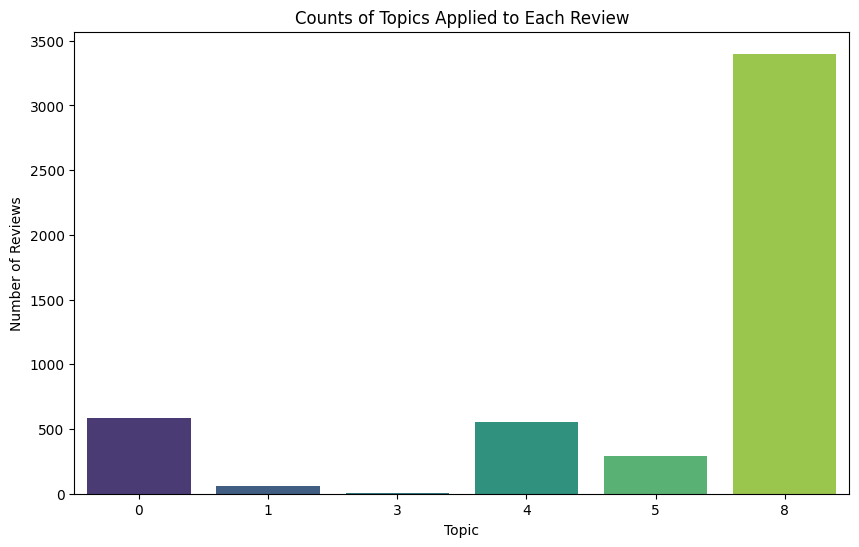

In [79]:
import seaborn as sns
topic_counts = df2['Dominant Topic'].value_counts().sort_index()

# Plot the counts
plt.figure(figsize=(10, 6))
sns.barplot(x=topic_counts.index, y=topic_counts.values, palette='viridis')
plt.xlabel('Topic')
plt.ylabel('Number of Reviews')
plt.title('Counts of Topics Applied to Each Review')
plt.show()